In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Step 2: Load the dataset
df = pd.read_csv("c://Users//prana//Downloads//Advertising.csv")
df = df.drop(columns=["Unnamed: 0"])  # remove unnecessary column
print(df)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]


In [6]:
# Step 3: Split data into features (X) and target (y)
X = df[["TV", "Radio", "Newspaper"]]
y = df["Sales"]


In [7]:
# Step 4: Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:

# Step 5: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Step 6: Make predictions
y_pred = model.predict(X_test)

In [10]:

# Step 7: Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [11]:

print("Model Performance:")
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")
print("Intercept:", model.intercept_)
print("Coefficients:", list(zip(X.columns, model.coef_)))

Model Performance:
R² Score: 0.899
RMSE: 1.782
Intercept: 2.9790673381226274
Coefficients: [('TV', np.float64(0.04472951746871633)), ('Radio', np.float64(0.18919505423437658)), ('Newspaper', np.float64(0.0027611143413671796))]


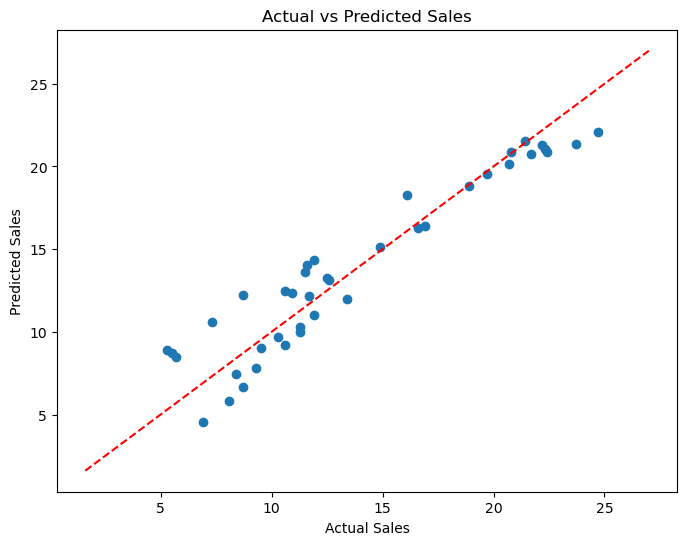

In [12]:
# Step 8: Visualize Actual vs Predicted Sales
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()


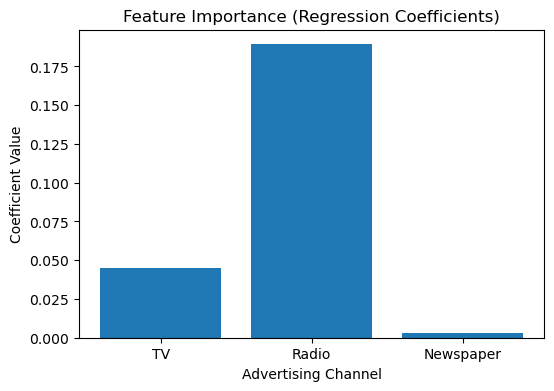

In [13]:
# Step 9: Feature Importance Visualization
plt.figure(figsize=(6,4))
plt.bar(X.columns, model.coef_)
plt.title("Feature Importance (Regression Coefficients)")
plt.xlabel("Advertising Channel")
plt.ylabel("Coefficient Value")
plt.show()